In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Octave - John Keells Codes/Use Cases Test/Q3.csv')

In [61]:
df.head(2)

,Store_ID,Date,Total_Sales,Promotion_Active,Discount_Percentage,Footfall,Region
0,1,2023-03-01,101000,No,0,101,Colombo
1,2,2023-03-01,102000,No,0,102,Kandy


In [62]:
df.dtypes

,0
Store_ID,int64
Date,object
Total_Sales,int64
Promotion_Active,object
Discount_Percentage,int64
Footfall,int64
Region,object


In [63]:
df.isnull().sum()

,0
Store_ID,0
Date,0
Total_Sales,0
Promotion_Active,0
Discount_Percentage,0
Footfall,0
Region,0


In [64]:
df.dropna(inplace=True)

In [65]:
df.duplicated().sum()

0

In [66]:
df.drop_duplicates(inplace=True)

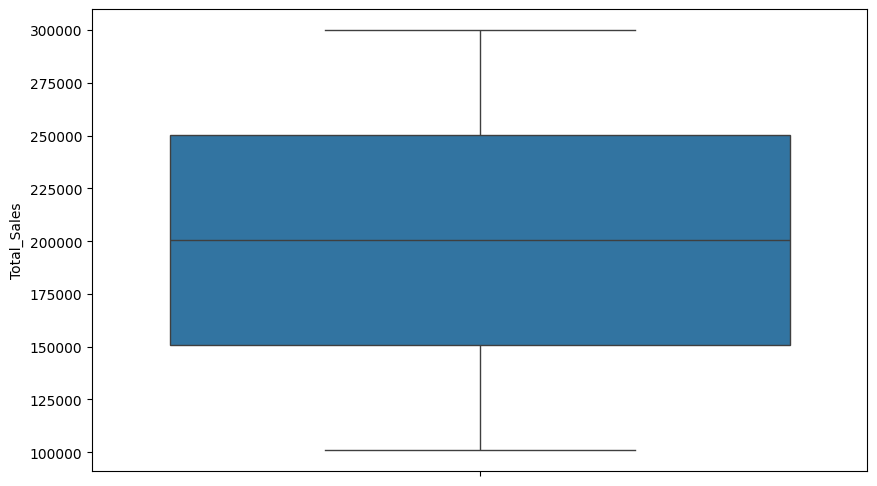

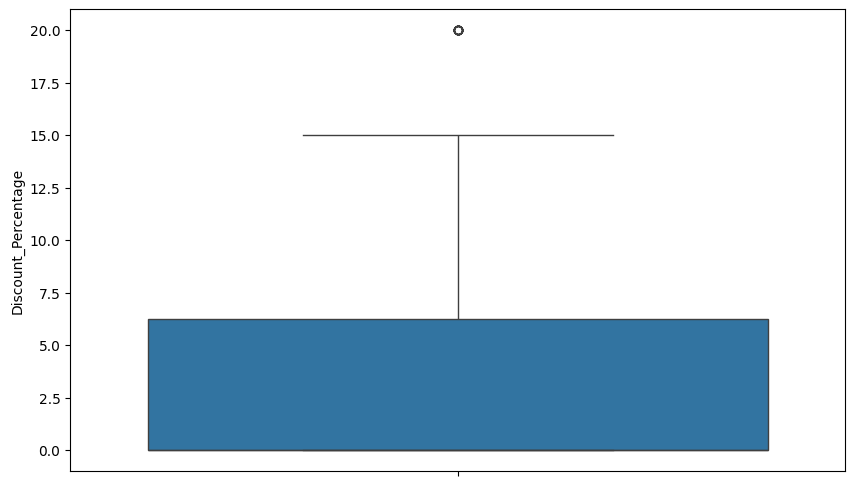

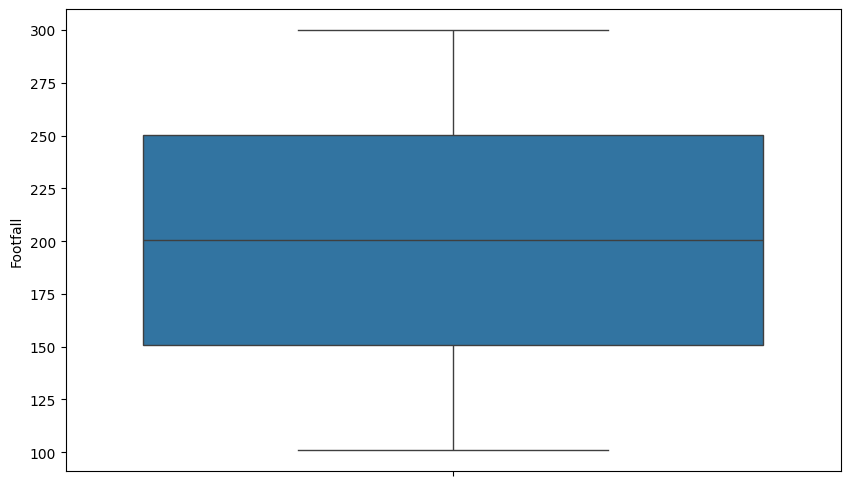

In [67]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]
numeric_df = numeric_df.drop(['Store_ID'], axis=1)
numeric_df

for col in numeric_df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(numeric_df[col])
  plt.show()

In [68]:
for col in numeric_df.columns:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  iqr = q3 - q1
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr
  df = df[(df[col] > lower_limit) & (df[col] < upper_limit)]

In [22]:
# q1_totalsales = np.percentile(df['Total_Sales'], 25)
# q3_totalsales = np.percentile(df['Total_Sales'], 75)
# iqr_totalsales = q3_totalsales - q1_totalsales
# upper_limit_totalsales = q3_totalsales + 1.5 * iqr_totalsales
# lower_limit_totalsales = q1_totalsales - 1.5 * iqr_totalsales

# print('Q1:', q1_totalsales)
# print('Q3:', q3_totalsales)
# print('IQR:', iqr_totalsales)
# print('Upper Limit:', upper_limit_totalsales)
# print('Lower Limit:', lower_limit_totalsales)

In [23]:
# q1_footfall = np.percentile(df['Footfall'], 25)
# q3_footfall = np.percentile(df['Footfall'], 75)
# iqr_footfall = q3_footfall - q1_footfall
# upper_limit_footfall = q3_footfall + 1.5 * iqr_footfall
# lower_limit_footfall = q1_footfall - 1.5 * iqr_footfall

# print('Q1:', q1_footfall)
# print('Q3:', q3_footfall)
# print('IQR:', iqr_footfall)
# print('Upper Limit:', upper_limit_footfall)
# print('Lower Limit:', lower_limit_footfall)

In [24]:
# df = df[(df['Total_Sales'] < upper_limit_totalsales) & (df['Total_Sales'] > lower_limit_totalsales)]
# df = df[(df['Footfall'] < upper_limit_footfall) & (df['Footfall'] > lower_limit_footfall)]

# df.head()

In [69]:
df.describe()

,Store_ID,Total_Sales,Discount_Percentage,Footfall
count,182.000000,182.000000,182.000000,182.000000
mean,25.725275,200450.549451,2.637363,200.450549
std,14.327708,57784.370315,4.893375,57.784370
min,1.000000,101000.000000,0.000000,101.000000
25%,13.250000,150500.000000,0.000000,150.500000
50%,26.000000,200500.000000,0.000000,200.500000
75%,38.000000,249750.000000,5.000000,249.750000
max,50.000000,300000.000000,15.000000,300.000000


In [74]:
# categorical_columns = df.select_dtypes(include=['object']).columns
# categorical_df = df[categorical_columns]
# categorical_df = categorical_df.drop(['Date'], axis=1)

# for col in categorical_df.columns:
#   print(categorical_df[col])
#   print(categorical_df[col].value_counts())

# Frequency tables
print(df['Promotion_Active'].value_counts())
print(df['Region'].value_counts())

Promotion_Active
No     134
Yes     48
Name: count, dtype: int64
Region
Kandy      68
Colombo    58
Galle      56
Name: count, dtype: int64


In [73]:
category_df = df[['Promotion_Active','Region']]

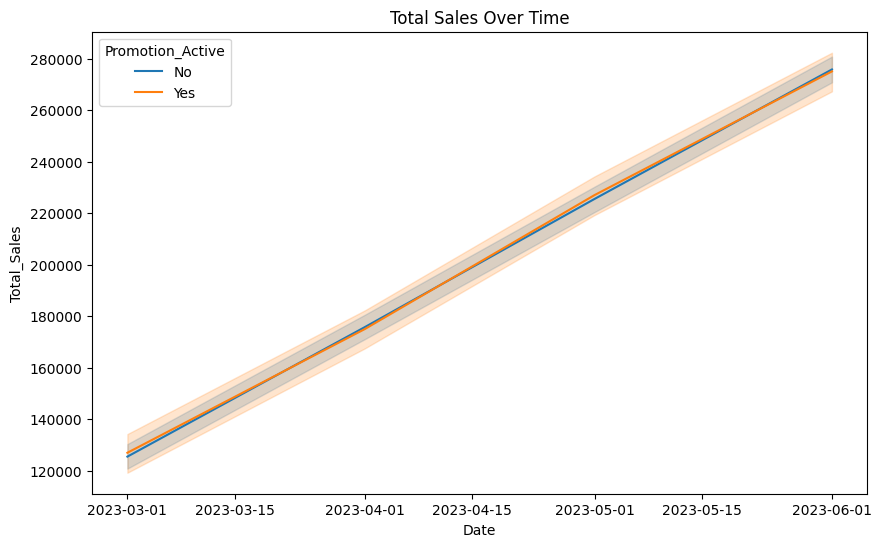

In [76]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Total_Sales', hue='Promotion_Active')
plt.title('Total Sales Over Time')
plt.show()

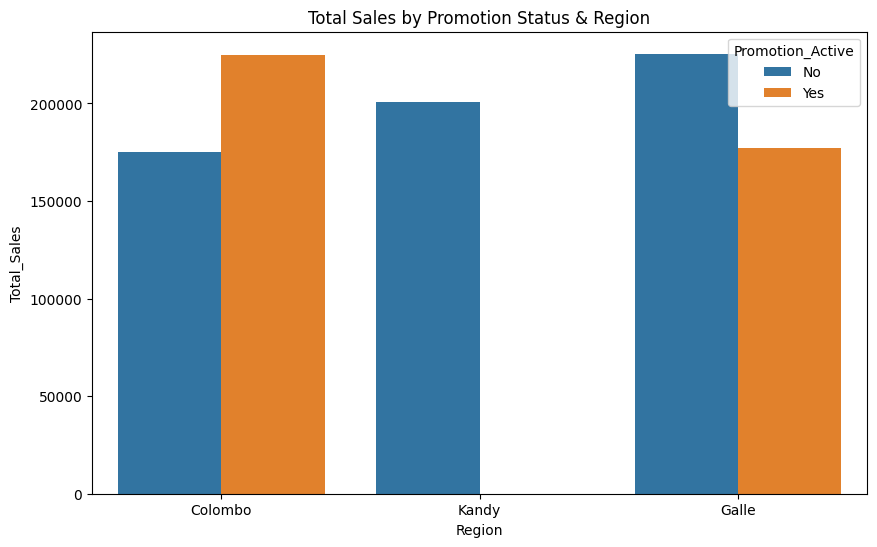

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Total_Sales', hue='Promotion_Active', ci=None, estimator=np.mean)
plt.title('Total Sales by Promotion Status & Region')
plt.show()

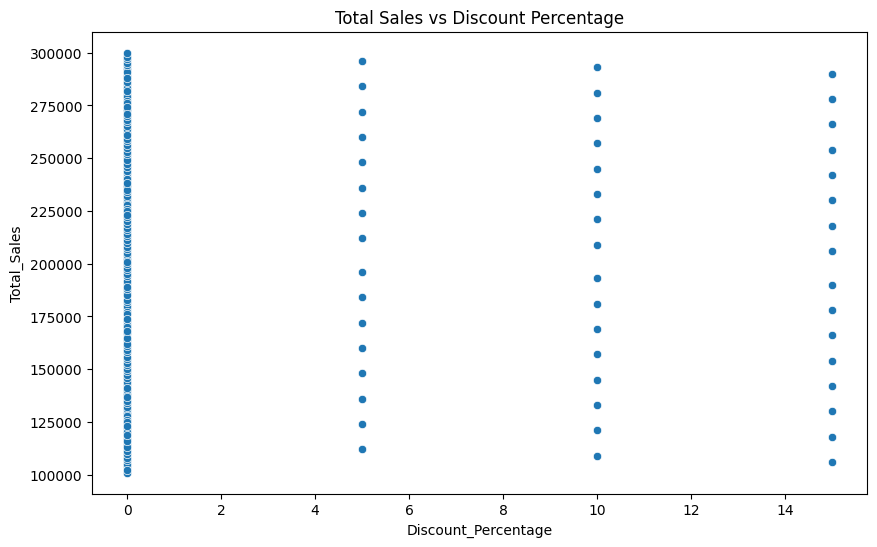

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount_Percentage', y='Total_Sales')
plt.title('Total Sales vs Discount Percentage')
plt.show()

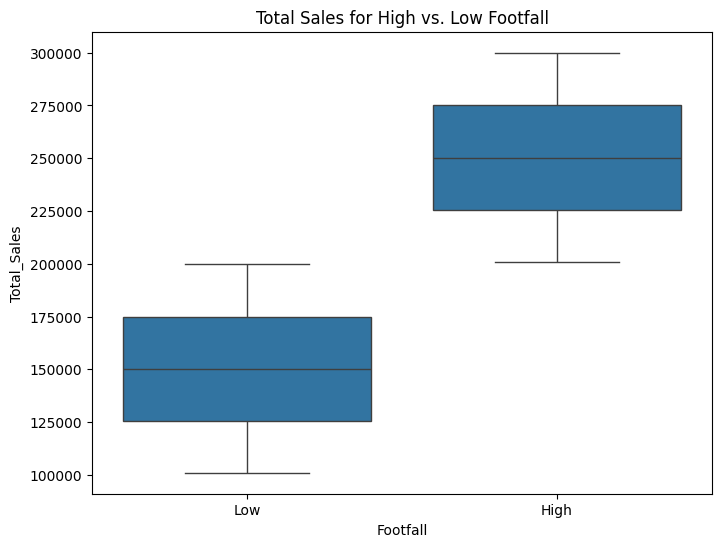

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=pd.qcut(df['Footfall'], 2, labels=['Low', 'High']), y='Total_Sales')
plt.title('Total Sales for High vs. Low Footfall')
plt.show()

In [89]:
df_grouped = df.groupby(['Promotion_Active'])['Total_Sales'].mean()
print(f"Average sales uplift on days when a promotion was active compared to non‑promotion days is {df_grouped}")

Average sales uplift on days when a promotion was active compared to non‑promotion days is Promotion_Active
No     200253.731343
Yes    201000.000000
Name: Total_Sales, dtype: float64


In [90]:
promo_sales = df[df['Promotion_Active'] == 'Yes']['Total_Sales']
no_promo_sales = df[df['Promotion_Active'] == 'No']['Total_Sales']
print("Average Sales (Promotion):", promo_sales.mean())
print("Average Sales (No Promotion):", no_promo_sales.mean())

Average Sales (Promotion): 201000.0
Average Sales (No Promotion): 200253.73134328358


In [92]:
correlation_coeef = df['Discount_Percentage'].corr(df['Total_Sales'])
print("Correlation Coefficient:", correlation_coeef)

Correlation Coefficient: -0.004225579454929108


Correlation Coefficient: 0.9999999999999999


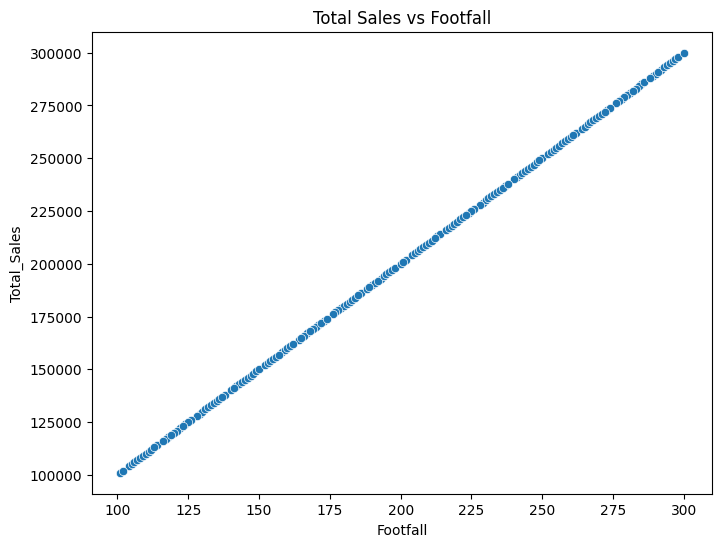

In [94]:
correlation_coef = df['Footfall'].corr(df['Total_Sales'])
print("Correlation Coefficient:", correlation_coef)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Footfall', y='Total_Sales')
plt.title('Total Sales vs Footfall')
plt.show()

In [102]:
campaign_effectiveness = df.groupby(['Region','Promotion_Active'])['Total_Sales'].mean()
print("Campaign Effectiveness by Region and Promotion Status:")
print(campaign_effectiveness)

Campaign Effectiveness by Region and Promotion Status:
Region   Promotion_Active
Colombo  No                  175000.0
         Yes                 225000.0
Galle    No                  225500.0
         Yes                 177000.0
Kandy    No                  201000.0
Name: Total_Sales, dtype: float64


In [ ]:
# H0 = Promotions have not significantly improved total promo_sales
# H1 = Promotions have significantly improved total promo_sales

In [105]:
promo_sales = df[df['Promotion_Active'] == 'Yes']['Total_Sales']
no_promo_sales = df[df['Promotion_Active'] == 'No']['Total_Sales']

from scipy import stats

t_statistic, p_value = stats.ttest_ind(promo_sales, no_promo_sales)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. Promotions have significantly improved total promo_sales.")
else:
    print("Fail to reject the null hypothesis. Promotions have not significantly improved total promo_sales.")

T-Statistic: 0.07656427550158197
P-Value: 0.9390552138423972
Fail to reject the null hypothesis. Promotions have not significantly improved total promo_sales.


In [ ]:
# prompt: Problem 2: A researcher wants to compare the effectiveness of two different medications for reducing blood pressure.
# Medication A is tested on 50 patients, resulting in a mean reduction of 15 mmHg with a standard deviation of 3 mmHg.
# Medication B is tested on 60 patients, resulting in a mean reduction of 13 mmHg with a standard deviation of 4 mmHg.
# At a 1% significance level, is there a significant difference between the two medications?

# Define the data for Medication A and Medication B
mean_a = 15
std_a = 3
n_a = 50

mean_b = 13
std_b = 4
n_b = 60

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind_from_stats(mean_a, std_a, n_a, mean_b, std_b, n_b)

# Significance level
alpha = 0.01

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine if there is a significant difference
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two medications.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two medications.")


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(df):
  df = df[['Total_Sales', 'Footfall', 'Discount_Percentage', 'Promotion_Active']]

  X = df[['Footfall', 'Discount_Percentage', 'Promotion_Active']]
  y = df['Total_Sales']

  category_columns = X.select_dtypes(include=['object']).columns
  numeric_columns = X.select_dtypes(include=['number']).columns

  preprocessor = ColumnTransformer(
      transformers=[
          ('cat', OneHotEncoder(), category_columns),
          ('num', StandardScaler(), numeric_columns)
      ]
  )

  model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  return model

model = linear_regression(df)
model

Mean Squared Error: 1.4880308532845817e-21
R-squared: 1.0


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['Promotion_Active'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Footfall', 'Discount_Percentage'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [113]:
model = model.named_steps['regressor']

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 200282.75862068968
Coefficients: [-2.80694055e-11  1.59161573e-11  5.81803028e+04 -1.72803993e-11]


In [107]:
df = df[['Total_Sales', 'Footfall', 'Discount_Percentage', 'Promotion_Active']]
df.dtypes

,0
Total_Sales,int64
Footfall,int64
Discount_Percentage,int64
Promotion_Active,object
